# Project1: Get to know the data
Project1 introduces you the Fashion Mnist dataset with some useful preprocessing and visualization methods, and covers Support Vectors Classification (SVC) for this dataset.

In [46]:
import os
import sys
sys.path.append("../../homework")
import matplotlib.pyplot as plt
import numpy as np


## Fashion Mnist 
Read [here](https://github.com/zalandoresearch/fashion-mnist) to learn more about the Fashion Mnist  dataset. 

In [47]:
# Load the Fashion Mnist  data
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('../data/', kind='train')
testX, testy = mnist_reader.load_mnist('../data/', kind='t10k')


In [48]:
# Print some statistics about the data
print("train image data shape:", trainX.shape)
print("train label data shape:", trainy.shape)
print("test image data shape:", testX.shape)
print("test label data shape:", testy.shape)

train image data shape: (60000, 784)
train label data shape: (60000,)
test image data shape: (10000, 784)
test label data shape: (10000,)


## 1. Visualize the flattened data (20 Points)
The 28x28 Fashion Mnist images have been flattened as 784 x 1 image vectors.

Flattening the data will lead to some loss of information (such as spatial correlation between pixels) but it is nevertheless useful for training some linear classifiers.

Write some code below to visualize the training “flattened” data. Please provide a brief analysis about the characteristics of flattened data from visualization.

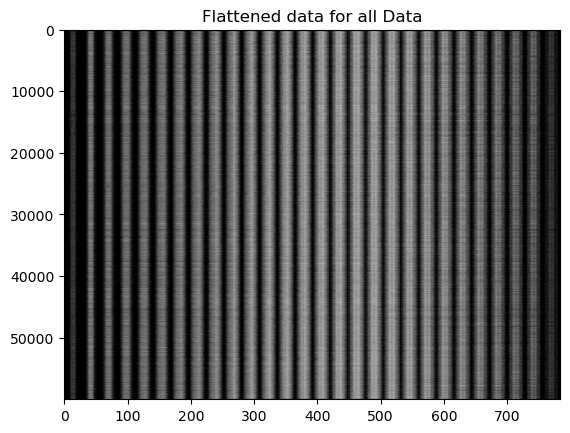

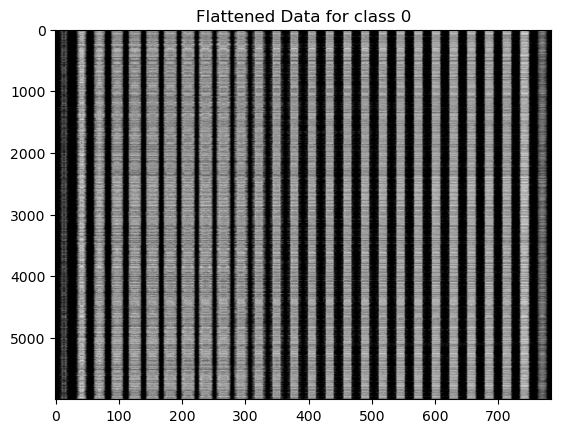

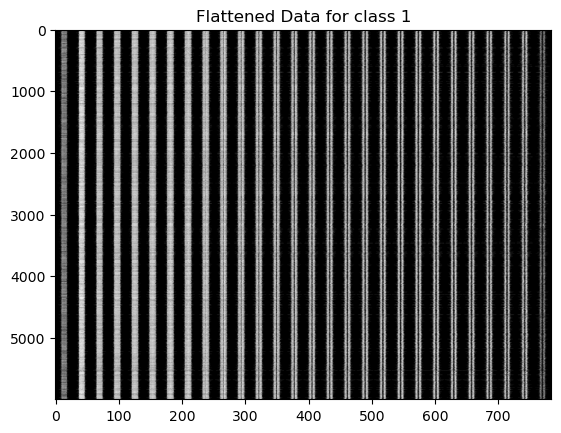

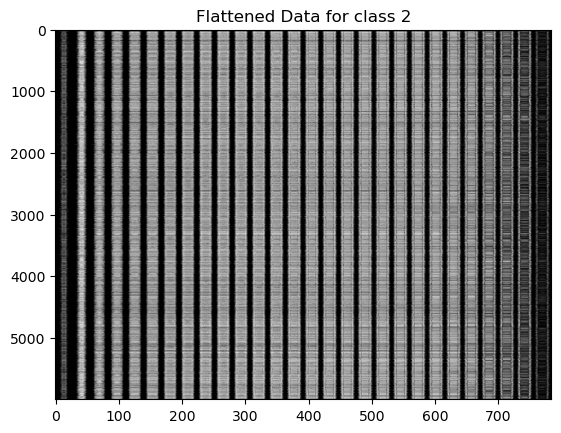

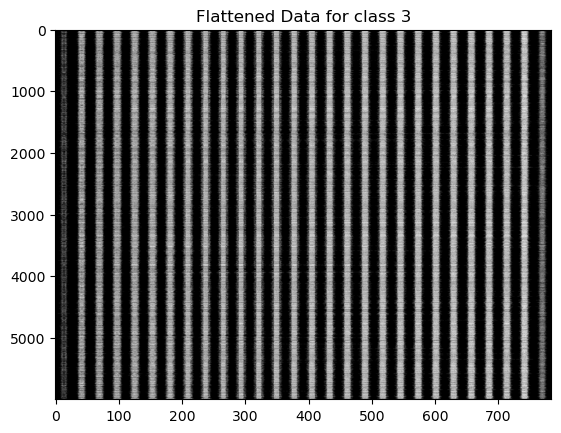

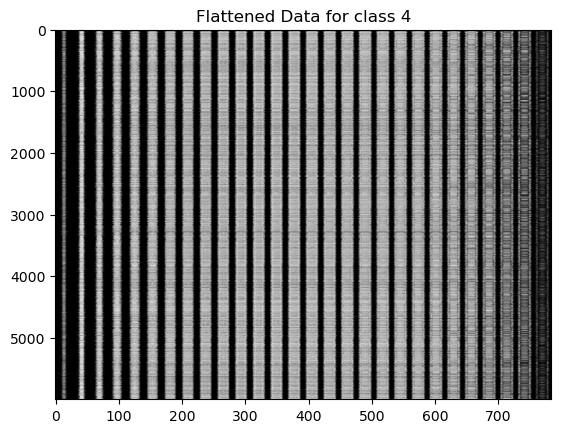

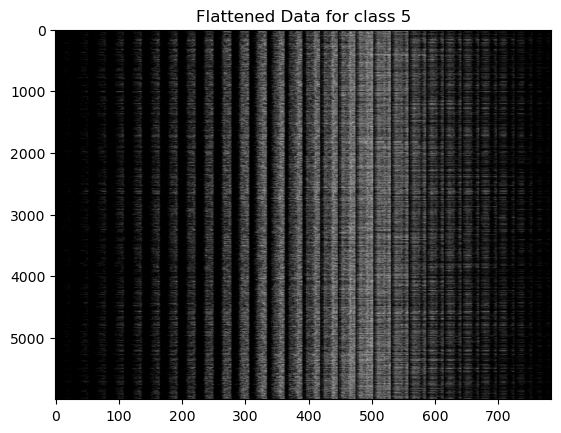

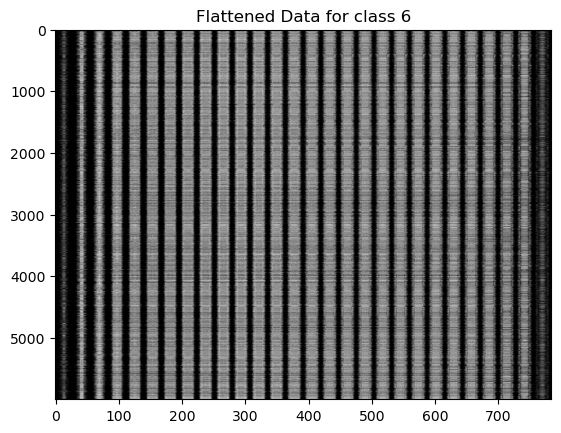

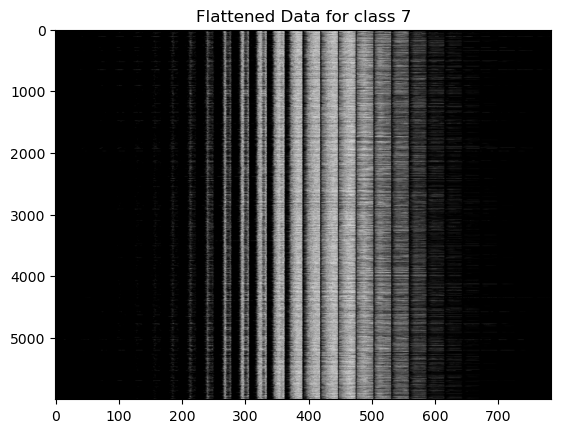

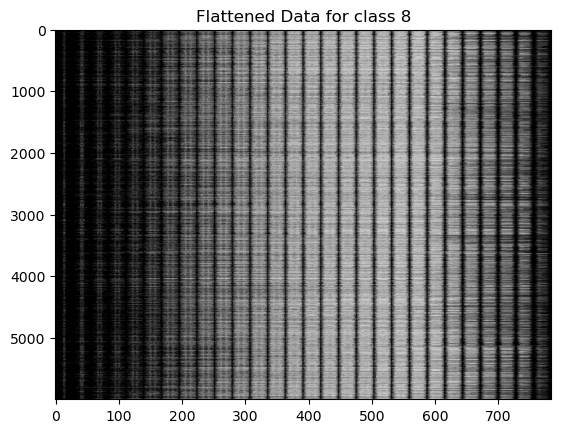

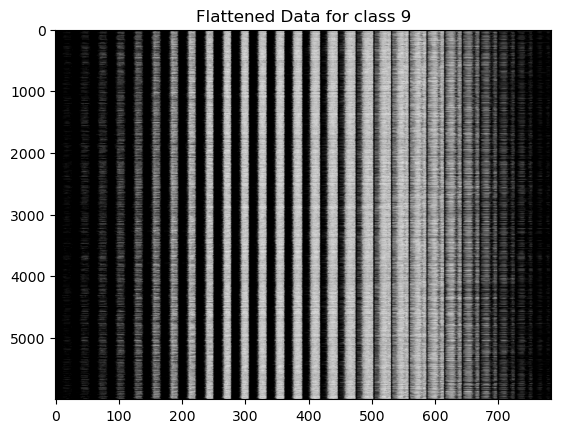

In [49]:
######################################################################
# TODO:                                                              #
# Visualize the data to analyze the characteristics of flattened data#
######################################################################
def visualizeFlattenedData(imagesMat, imagesLabel, limit, newShapeSize):
    plt.imshow(imagesMat,"gray",aspect = 'auto')
    plt.title("Flattened data for all Data")
    plt.show()
    fig = plt.figure()
    for imgClass in range(10):
        listImg = np.zeros((6000,np.size(imagesMat,1)))
        count = 0
        for index, label in enumerate(imagesLabel):
            if label == imgClass:
                listImg[count] = imagesMat[index]
                count += 1
        plt.imshow(listImg,"gray",aspect = 'auto')
        plt.title("Flattened Data for class "+str(imgClass))
        plt.show()

    
    
visualizeFlattenedData(trainX, trainy, 5, 28)
######################################################################



#                       END OF YOUR CODE                             #
######################################################################

We plot both the flattened data of all 60000 data and the individual data plots of the different classes separately for our analysis where each class has 6000 data points as explained in mnist documentations.

We can determine some observations using the individual class flattened data.

Each of these flattened data can be visualized as a rectangular matrix image where each row represents one image data and each column of any single data illustrates the image pixel values/features arranged in a corresponding format. Generally all the plots seem to show patterns with alternating bright and dark vertical lines of differing thicknesses across the x axis of the plot. Additionally the shape of these lines do not seems to change much across(no bending or very little distortions in straightness) the different data in all each plots along the y axis. However, across the data we can somewhat observe along the bright lines different data might cause slight variances in their pixel intensities.

From the plot of all 60000 flattened data, we can see that there is somewhat a pattern where the lighter pixels are centers and raidates out to more darker pixels around the left and right ends of the plot. This general consistent pattern might be possible due to all the images of the MNIST data having darker corners and the image object being generally present at the center of the image as we see in the next section averaged images.

The plot also shows that it is not symmetric from the center 392 but the center of symmetry is slightly further away to the right approximately around the 450th column/feature mark in the x axis. Although the shirts and pants related objects are somewhat symmetric, we notice that the shoes/footware are rather shown from a side angle where majority of the pixel intensity is focused on the right side of the image samples. Therefore, we this account for the slight deviation from the center of symmetry.

This pattern of arrangement across the different rows is what can be clearly observed across the individual classes to be the same. For instance, class 0 has brighter and thicker patterns on the left side and has more darker and thinner patterns towards the right and this is observed across all its rows in our visualisation above. 

Similarly class 6 is very distinct as a focused bright lines at its 300 to 600 mark along the x axis and mostly dark pixels everywhere else. Similarly other classes also have their own distinguishing patterns and no two classes have the same pattern. 

Therefore, it is evident of the representation of the different classes, showing clear evidence there is some similiarity within classes and distinguishing factors(variations) between one class to another. Ultimately this is crucial when we use our machine learning algorithms to do classification for these 10 classes.


## 2. Visualize the 2D averaged data  (20 Points)
Please write some code to reshape the training flattened data back to 2D 28x28 images and plot every "average" images of classes 0-9. Please provide a brief analysis about the difference between the 2D images and flattened data of Fashion Mnist from visualization.

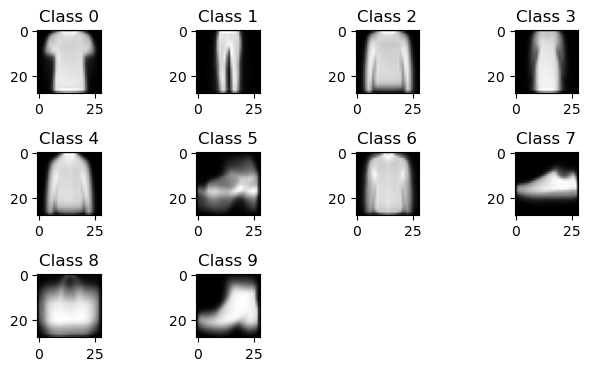

In [50]:
#####################################################################
# TODO:                                                             #
# Plot each "average image" of classes 0-9                          #
#####################################################################
# your code

def determineAverageImage(imgClass, imagesMat, imagesLabel):
    avgImg = np.zeros((1,np.size(imagesMat,1)))
    count = 0
    for index, label in enumerate(imagesLabel):
        if label == imgClass:
            avgImg += imagesMat[index]
            count += 1
    avgImg = avgImg/count
    return avgImg

def obtainAverageImages(numClasses, imagesMat, imagesLabel):
    avgImgsArray = np.zeros((numClasses, np.size(imagesMat,1)))
    for imgClass in range(numClasses):
        avgImg = determineAverageImage(imgClass, imagesMat, imagesLabel)
        avgImgsArray[imgClass] = avgImg
    visualize2DFlattenedData(avgImgsArray, 4, 28)
        
def visualize2DFlattenedData(imagesMat, limit, newShapeSize):
    fig = plt.figure()
    for i in range(10):
        img = np.reshape(imagesMat[i : (i + 1)], (newShapeSize, newShapeSize))
        ax = fig.add_subplot(limit, limit, i + 1)
        ax.set_title("Class "+str(i))
        fig.tight_layout()
        plt.title
        plt.imshow(img, cmap='gray')
    plt.show()

obtainAverageImages(10, trainX, trainy)   
    

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

The similarity between the 10 2D images that we have generated above and the 10 classes of flattened data is that when visualized, they show the gist of the average data of what is expected from the particular labelled class. In the flattened images, we see the pattern across the rows being so consistent across the data in a particular class whereas in our average images we can see the general outline of how the item in a particular class would look like visually.
The difference is in the representation in terms of the pattern versus the representation as an averaged 2D image.

We can also see that there is a somewhat blur in these averaged 2D images especially so when for the footwear class number 6th from the left above. This is possibly due to certain addition or loss of certain features particularly the shape, within the classes themselves which can result in the averaged image having a blurred effect. However, a general outline of the object in the class can be clearly recognised in this averaged images visually, however, in our flattened image plots, we cannot recognise this.

Moreover, one very noticable feature across the shirts, pants and dress classes such as class 0,1,2,3,4 and 6 have a very similar flattened image visualization with alternating bright and dark lines appearing consistently across the x axis and only becoming darker at the very ends. However, in classes 5 and 7 which appear as more footwear related classes, show similar patterns in their flattened images plot with very dark pixels in the corners of the x axis and most bright lines focused at the center region around 300 to 600 mark. This is consistent with the 2D image plots as majority of the pixels at the top and bottom of the footwear are rather dark pixels as compared to our other objects.

As for class 8 seems to describe bags, where top is mostly dark except the handle part as seen in the 2D plots and bottom has a very thin layer of dark pixels. This is analogus to the flattened image plot for class 8 where left side are generally more dark pixels and towards the right side of the x axis there is still somewhat visible bright lines even across the 750 mark.

In conclusion, the flattened images are similar to the averaged 2D image plots, and can be seen as the 2D images themselves somewhat if rotated anti clockwise 90 degrees but in a rather different, alternating black and white lines format. This can be visualized as below.

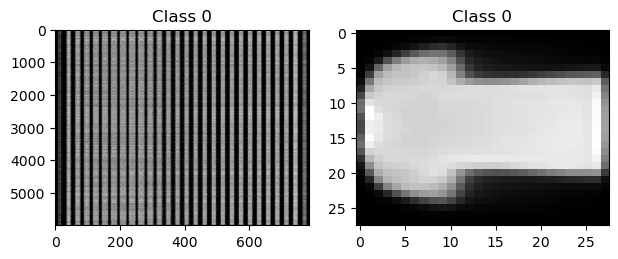

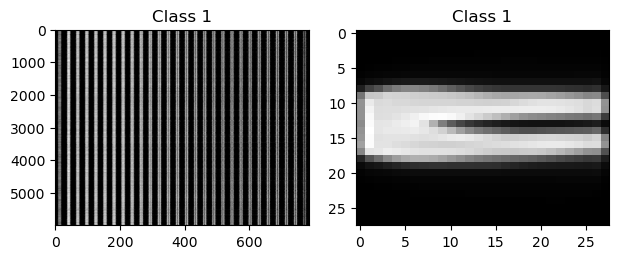

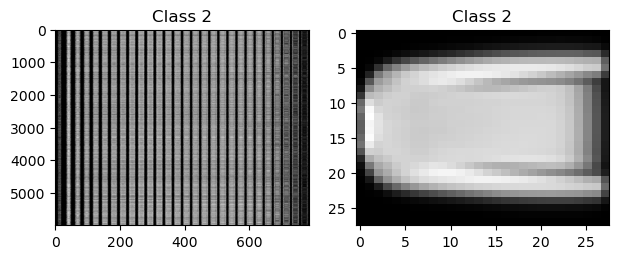

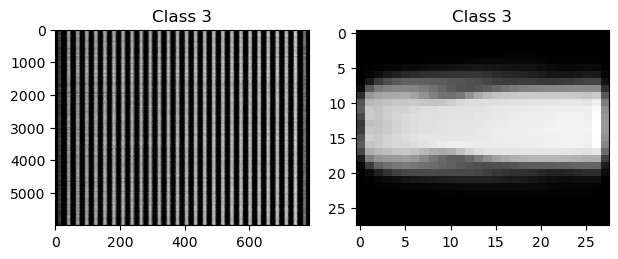

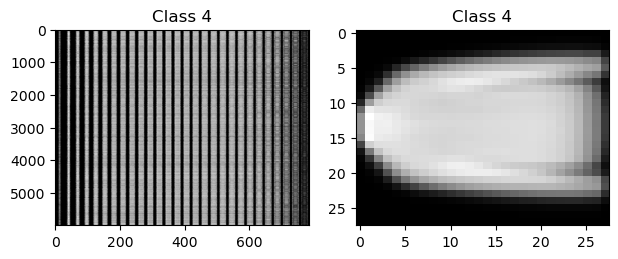

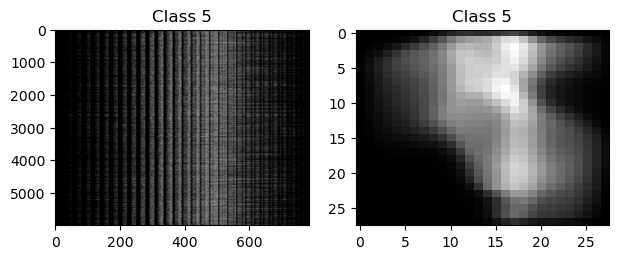

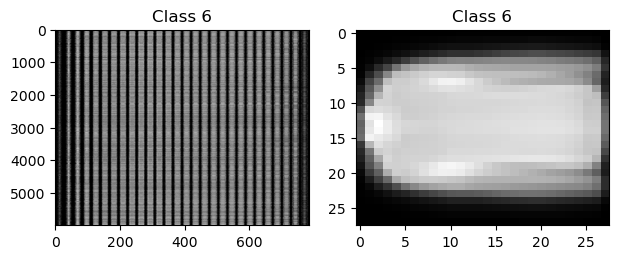

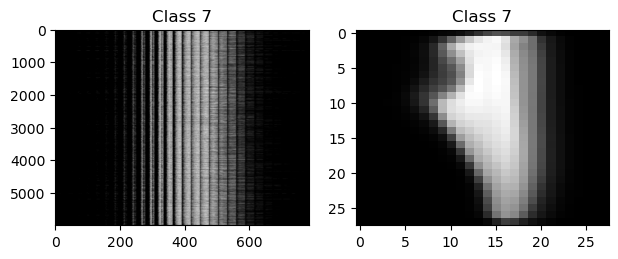

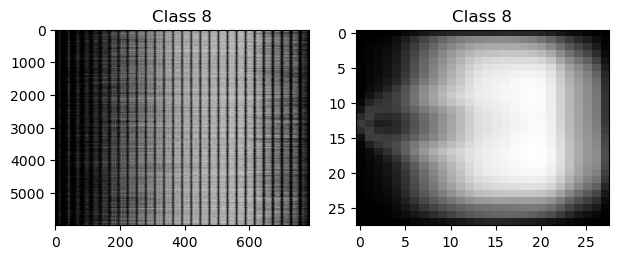

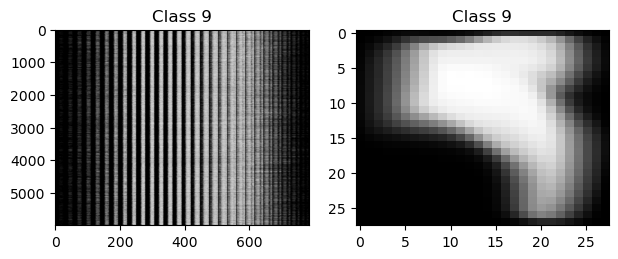

In [51]:
for i in range (0,10):
    fig = plt.figure()
    ax = plt.subplot(2,2,1)
    ax.set_title("Class "+str(i))
    fig.tight_layout()
    plt.title
    class_plot = trainX[trainy == i]
    plt.imshow(class_plot,"gray",aspect = 'auto')
    ax = plt.subplot(2,2,2)
    ax.set_title("Class "+str(i))
    fig.tight_layout()
    plt.title
    avg_img = np.average((trainX[trainy==i]),0)
    plt.imshow(np.rot90(avg_img.reshape(28,28)),'gray',aspect = 'auto')
    plt.show()

## 3. Implement PCA analysis for the flattened data (30 Points)
Please write some code to implement the Principle Component Analysis (PCA) analysis for the training flattened data, and plot the <font color=black>**first 100 points of**</font> the first principle component against the second principle component. Note: please plot the components in different colors according to their classes. The coordinate of each point is (first_principle_component, second_principle_component).

From the visualization, please give a brief discussion on whether the first principle component and second principle component is sufficient to classify the 10 classes of flattened data?

### 3.1 Normalized data to zero mean (5 Points)
In this step, please write a method to normalized the flatten data to zero mean one variance.

In [52]:
def Normalization(data):
    # your code starts here
    normalized_data = (data - data.mean()) / data.std()
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################
    return normalized_data
#test
output = Normalization(trainX)
print(output.mean(),output.std())

-1.74808013869143e-17 1.0


### 3.2 PCA implementation using numpy (15 Points)
In this step, please implement the PCA using numpy.

In [53]:
#####################################################################
# TODO:                                                             #
# Implement PCA analysis for the 2D flattened data  
# Hint: You can only use numoy to implement the codes for PCA
#     use np.linalg.eig             
#####################################################################

def PCA(trainX, k): # k is the number of new dimensions 
    norm_X = Normalization(trainX)
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(norm_X[0:100]))
    indices = np.argsort(eigenvalues)[::-1]
    new_data = eigenvectors[:,indices]
    variation_list = []
    for val in eigenvalues:
        variation_list.append(val/sum(eigenvalues)*100)
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################
    return new_data[:,:k],eigenvalues
#test
output,eigenvalues = PCA(trainX,2)


### 3.3 Ploting of the principle components. (10 Points)
In this step, please plot the first and second principle components of the first 100 samples using matplotlib. 

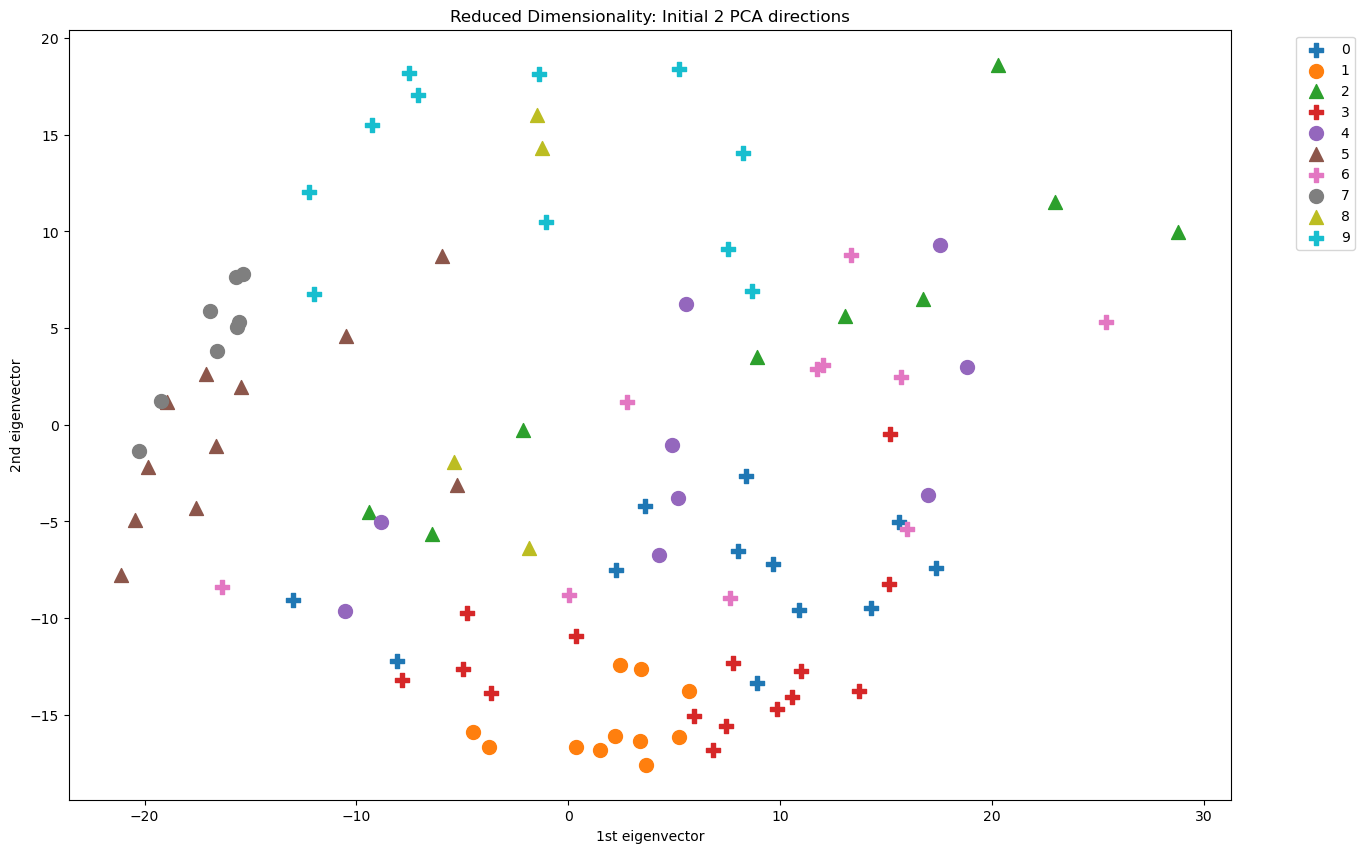

In [54]:
#####################################################################
# TODO:                                                             #
# PCA analysis for the 2D flattened data  
# Hint: from sklearn.decomposition import PCA
#       use PCA(svd_solver='auto').fit_transform(trainX) 
#       to compute the PCA of trainX                                #
#####################################################################
# your code starts here
from sklearn.decomposition import PCA


def plot2DPCA(x_transformed_data, y_small, markers):
    # plot 2d PCA projection
    plt.figure(figsize=(15,10))

    for i, c in enumerate(np.unique(y_small)):
        indices = np.where(y_small.flatten()==c)
        plt.scatter(x_transformed_data[indices, 0], x_transformed_data[indices, 1],
              marker=markers[i%3], s=100, label=int(c))
        
    plt.xlabel('1st eigenvector')
    plt.ylabel('2nd eigenvector')
    plt.title("Reduced Dimensionality: Initial 2 PCA directions")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

def generatePCA(X_train, y, sampling_count):
    X_small = X_train[0:sampling_count,:]
    y_small = y[0:sampling_count]
    # normalise
    x_norm = Normalization(trainX)

    # apply PCA and keep 2 first components
    x_transformed_data = PCA(n_components=2, svd_solver='auto').fit_transform(x_norm)
    return x_transformed_data, y_small

markers = ["P","o", "^"]
x_transformed_data, y_small = generatePCA(trainX, trainy, 100)
plot2DPCA(x_transformed_data, y_small, markers)

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################


From the plot above, we can clearly see that we can identify certain clusters such as the class 1, class 5, class 7 are clearly visible in their own area separated well by the principle components. However, it is worth noting that much of the other classes acutally experience much overlap in determining a clear cut cluster that allows us to separate and identify the classes within sufficient accuracy. This can be oberserved in areas where classes 0, 4, 6 and 3 are overlapping and within each class the points are very far apart from one another in varying directions. It is best to use more principle components to classify the data with more accuracy for all the 9 classes.


## 4. Use Support Vectors Classification (SVC) to classify the principle components (PC) of training flattened data (30 Points)

Please write some code to train the Support Vectors Classification (SVC) using the <font color=black>**ALL Training Data**</font>. Then, evaluate the trained SCV on the test dataset. 

For each of the 100 nodes, its coordinate is (firstPC, secondPC).

### 4.1 Concatenate train and test data (5 Points)
In this step, please concatenate the train and test data for PCA, and get the principle components (PC with k = 2) of train and test data

In [55]:
def Concatenate(trainX,testX,k=2):
# your code starts here
    norm_trainX = Normalization(trainX)
    norm_testX = Normalization(testX)
    concatdata = np.vstack((norm_trainX, norm_testX))
    x_transformed_data = PCA(n_components=k, svd_solver='auto').fit_transform(concatdata)
    eigenvalues = []
    for i in range(k):
        eigenvalues.append(np.sum(x_transformed_data[:,i]**2))
    norm_trainX = x_transformed_data[0:60000]
    norm_testX = x_transformed_data[60000:]
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################
    return norm_trainX,norm_testX,eigenvalues
#test 
norm_trainX,norm_testX,eigenvalues = Concatenate(trainX,testX,2)
print(norm_trainX.shape,norm_testX.shape)
print(eigenvalues)

(60000, 2) (10000, 2)
[11131671.664516568, 6795638.822644511]


### 4.2 Support Vectors Classification (SVC) (10 Points)

In this step, please write the code to train a SVC for classification. You may use the skelarn SVC.

In [56]:
from sklearn import svm
from sklearn.metrics import accuracy_score

norm_trainX,norm_testX,eigenvalues = Concatenate(trainX,testX,2)
def train_SVC(X, Y,testX,testY):
#####################################################################
# TODO:                                                             #
# Hint: from sklearn import svm 
#       please return the accuracy over the test set                #
#####################################################################
    svc = svm.SVC()
    svc.fit(X, Y)
    y_pred = svc.predict(testX)

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################
    #return accuracy
    return str(accuracy_score(testY, y_pred)*100)+"%"
#test
print("test accuracy is {}".format(train_SVC(norm_trainX[:1000],trainy[:1000],norm_testX[:1000],testy[:1000])))

test accuracy is 52.7%


### 4.3 Scree Plot of PCA component  (10 Points)

In this step, plot the [scree plot](https://en.wikipedia.org/wiki/Scree_plot#:~:text=The%20scree%20plot%20is%20used,known%20as%20a%20scree%20test.) displays of PCA to select the proper k for training SVC. Y axis is the cumulated variance, and x axis is the number of priciple components (PC). Please only plot the first 10 PC. 

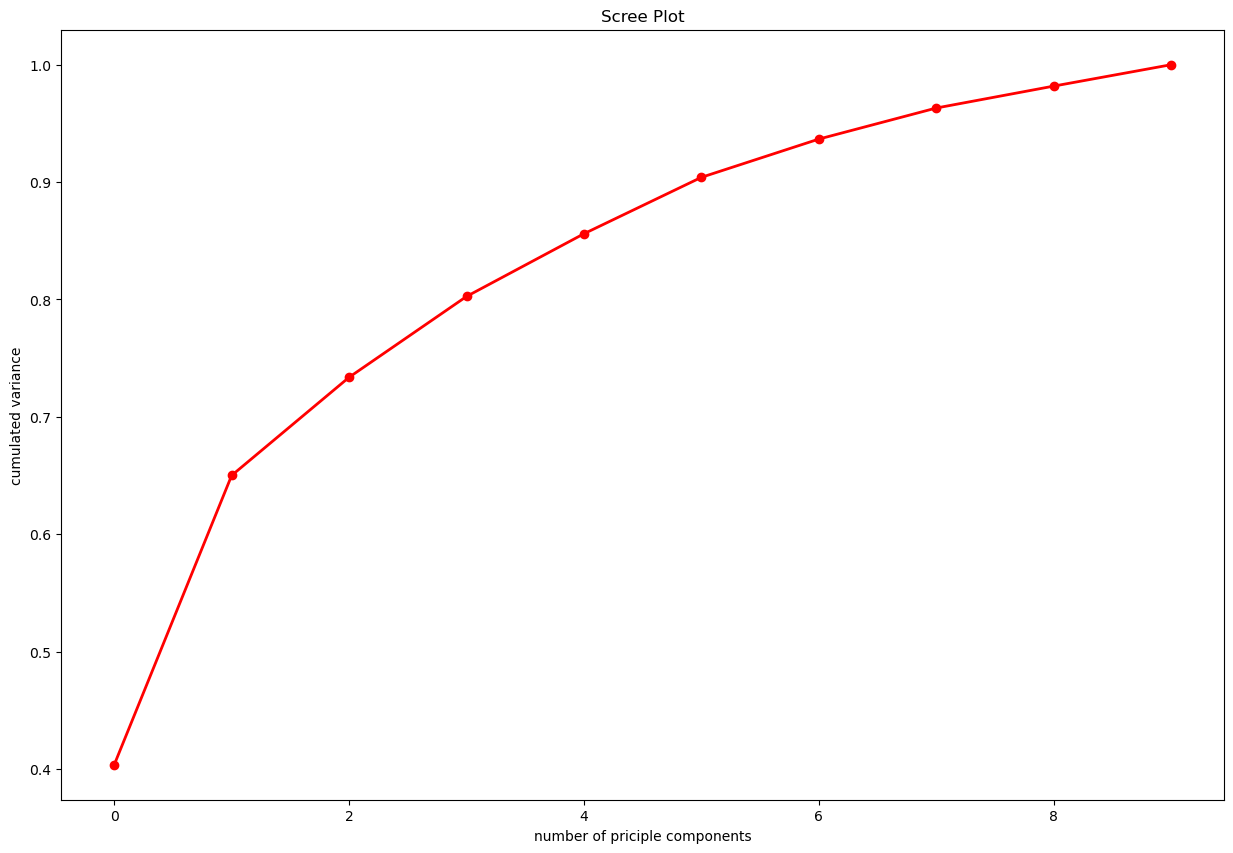

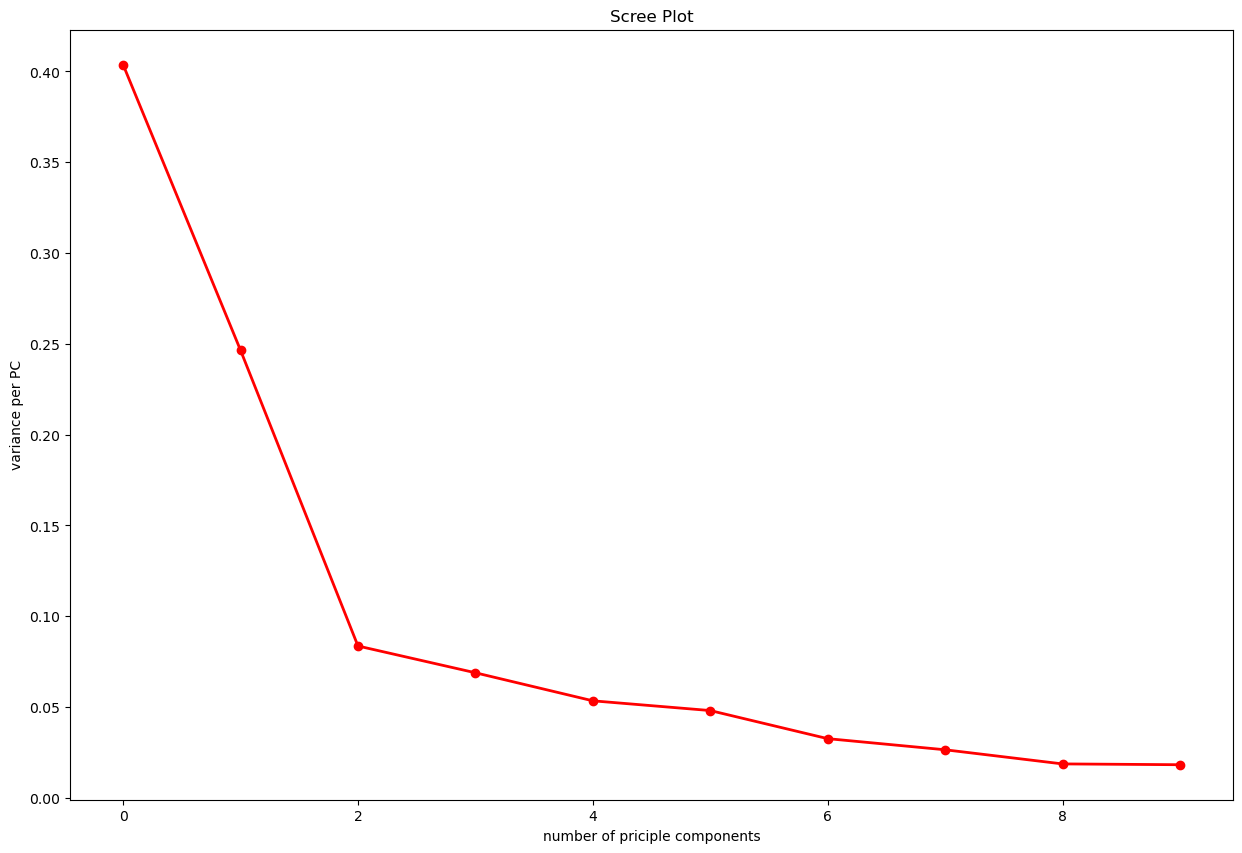

In [57]:
def plot_scree(trainX,trainy,testX,testy,k=10):
    norm_trainX,norm_testX,eigenvalues = Concatenate(trainX,testX,k)
    variance_ratio,variance_per_PC = cumulativeExplainedVariance(eigenvalues, k)
    plt.figure(figsize=(15,10))
    plt.plot(range(10),variance_ratio, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('number of priciple components')
    plt.ylabel('cumulated variance') 
    plt.show() 
    plt.figure(figsize=(15,10))
    plt.plot(range(10),variance_per_PC, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('number of priciple components')
    plt.ylabel('variance per PC') 
    plt.show() 

def cumulativeExplainedVariance(S, k_range):
    variance_ratio = np.zeros(k_range) # Cumulative explained variance ratio
    variance_per_PC = np.zeros(k_range)
    for i in range(k_range):
        variance_ratio[i] = np.sum(S[0:i+1])/np.sum(S)
        variance_per_PC[i] = S[i]/np.sum(S)
    return variance_ratio, variance_per_PC

#test 
plot_scree(trainX,trainy,testX,testy,k=10)

From the above scree plot visualization, we can see that the cumulated variance rises sharply from 0 to 1 and thereafter the cumulative variance increases at a decreasing rate until 10 components and ideally for our classification model to considered fairly accurate, we set the threshold required to be about 0.90(90%) without losing much information in the PCA dimensionality reduction while retaining sufficient information to gain a fairly accurate model. This way we maximize the variance between the original data and the projected data.

### 4.4 Retrain SVC based on the optimal k obtained from the scree plot (5 Points)

In this step, please choose the optimal k based on the scree plot to retrain the svc. k should be less of equal than 10. Please do it based on the methods you realized previously. Only Train and test first 1000 samples as we do in 4.2

In [58]:
def retrain_SVC(trainX,trainy,testX,testy):
    no_to_train = 1000
    no_to_test = 1000
    norm_trainX,norm_testX,eigenvalues = Concatenate(trainX,testX,6)
    accuracy = train_SVC(norm_trainX[:no_to_train],trainy[:no_to_train],norm_testX[:no_to_test],testy[:no_to_test])
    return accuracy


#test
accuracy = retrain_SVC(trainX,trainy,testX,testy)
print("accuracy is {}".format(accuracy))

accuracy is 72.39999999999999%


In your submission, in addition to the completed codes and the resulting images for the visualizations, also provide brief responses to the above questions and a brief analysis of the visualized data. 